<h1 align=center><font size = 8>Identification of best possible areas in Moscow to open convenience stores</font></h1>

# Introduction

<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Moscow-City_%2836211143494%29.jpg"/>

**Moscow** is the capital, most populous and extensively growing  city of Russia with over 15 millions of people within the city area. It is important financial and cultural center. As a representative of a big retail business, we want to access an opportunity to change our business model to opening convinience stores in highly populated city areas instead of opening new stores in large shopping malls which used to be popular several years ago. 

We want to be closer to our client by providing them ability to purchase everyday goods near their houses without necessity to visit shopping malls located far away from their residential areas. By using this approach, we also expect reducing of our rent payments and even more - we tend to consider spreading of convinience stores in Moscow as a part of our social responsibility - due to the fact that such business model brings not only convinience to our clients but at the same time it saves their personal time and reduces city daily traffic. 

In frame of this research we are going to segment city areas taking into account their population and number of stores that alredy exist in that area (they will be our competitors). For the research we made some assumptions:
* At first place, we are interested in areas with not only high population but high population density and lower amount of competitors. Such approach allows us to highlight the best possible areas to open new convinience stores
* We study only city area of Moscow without taking into account metropolitan one due to the same reason - population dencity and logistic issues

So, the main goal is to find new places for business expansion. 

# Toolbox & Data

After some investigation I have found out that there are no ready sets of open data that will fit our study. At first, we have to define data that we need, collect and prepare it and even produce new data. 

We will take a list of Moscow areas, their population and population density from the <a href="https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B">Wikipedia page.</a>  Please, don't pay attention to cyrillic symbols at this moment is you don't understand russian. I will translate it during further data processing.

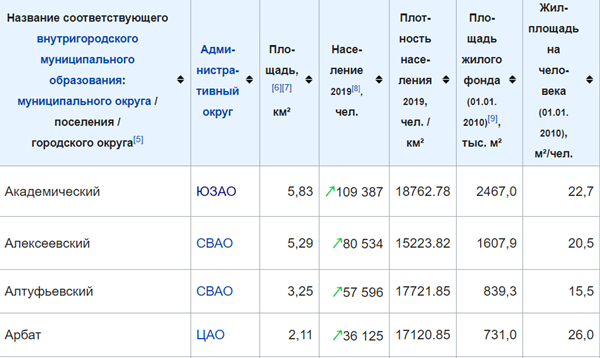

For our purposes, we will use the following toolbox:
* <font color="blue">Jupyter Notebook</font>  - to make the study, visualisation and reporting
* <font color="blue">Nominatim service</font> - to enrich our data set with geospatial coordinates 
* <font color="blue">Foursquare API v2</font> - for doing exploratory analysis, finding venues and explore moscow areas by geospatial coordinates 
* <font color="blue">Python and its libraries (like pandas, numpy, etc.)</font> - for data processing 

# Data Preparation

In [15]:
#import required libraries
import pandas as pd
import numpy as np

In [3]:
!pip install BeautifulSoup4
import requests
from bs4 import BeautifulSoup

In [4]:
#let's get the list of Moscow districts and neighbourhoods
!pip install lxml
response = requests.get("https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B").text
soup = BeautifulSoup(response, 'lxml')

In [5]:
##clean and prepare source table 
### we will delete columns that we are not inrested in
moscow_table = soup.find('table', {'class':'standard sortable'})
df = pd.read_html(str(moscow_table))[0]
headers = ['Num','Flag','Moto','Borough', 'Neighbourhood','Okrug','Square_KM2','Population','PopDensity_KM2','RE','REonPerson']
df.columns = headers
df.drop(columns=['Num','Flag','Moto','Square_KM2','RE','REonPerson'], inplace = True)
#normalize data in columns
df.replace(to_replace=r'^↗|↘', value='', regex=True, inplace = True)
df.head(5)


,Borough,Neighbourhood,Okrug,Population,PopDensity_KM2
0,Академический,Академический,ЮЗАО,109 387,18762.78
1,Алексеевский,Алексеевский,СВАО,80 534,15223.82
2,Алтуфьевский,Алтуфьевский,СВАО,57 596,17721.85
3,Арбат,Арбат,ЦАО,36 125,17120.85
4,Аэропорт,Аэропорт,САО,79 486,17355.02


In [6]:
#leave only central okrugs (drop all rows where Okrug in ('ТАО', 'НАО', 'ЗелАО'))

df = df[~df['Okrug'].isin(['ТАО','НАО','ЗелАО'])]
#check that everything is fine
df['Okrug'].unique()

array(['ЮЗАО', 'СВАО', 'ЦАО', 'САО', 'ЮАО', 'ВАО', 'ЗАО', 'ЮВАО', 'СЗАО'],
      dtype=object)

In [8]:
#!pip install openpyxl
df.to_csv('1.csv')

In [ ]:
##next step - enrich DF with lat long coordinates and show Moscow map

#1. show map of Moscow

In [7]:
## Get Foursquare credentials 
CLIENT_ID = 'BSG4WZUATSUUDOL2WSF22FDDJLXCIFYFYUMEVNGWE44011ES' # Foursquare ID
CLIENT_SECRET = 'BIQ3J2INYQ4RTZ4G2AT5ZW24GT2OQOG3D22HRMMNKC0ISIOG' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: BSG4WZUATSUUDOL2WSF22FDDJLXCIFYFYUMEVNGWE44011ES
CLIENT_SECRET:BIQ3J2INYQ4RTZ4G2AT5ZW24GT2OQOG3D22HRMMNKC0ISIOG


In [8]:
#try to get geo coordinates with nominatim
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    num

In [9]:
#quick test just to check if it works
address = 'Академический, ЮЗАО'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address,timeout=20)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

55.6897377 37.5767712


In [10]:
df.head(2)

,Borough,Neighbourhood,Okrug,Population,PopDensity_KM2
0,Академический,Академический,ЮЗАО,109 387,18762.78
1,Алексеевский,Алексеевский,СВАО,80 534,15223.82


In [12]:
df['address'] = df['Neighbourhood']+', ' + df['Okrug']
df.head(5)

,Borough,Neighbourhood,Okrug,Population,PopDensity_KM2,address
0,Академический,Академический,ЮЗАО,109 387,18762.78,"Академический, ЮЗАО"
1,Алексеевский,Алексеевский,СВАО,80 534,15223.82,"Алексеевский, СВАО"
2,Алтуфьевский,Алтуфьевский,СВАО,57 596,17721.85,"Алтуфьевский, СВАО"
3,Арбат,Арбат,ЦАО,36 125,17120.85,"Арбат, ЦАО"
4,Аэропорт,Аэропорт,САО,79 486,17355.02,"Аэропорт, САО"


In [13]:
geolocator = Nominatim(user_agent="foursquare_agent")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['address'].apply(geocode)
df['lat'] = df['location'].apply(lambda loc: loc.point[0] if loc else None)
df['lon'] = df['location'].apply(lambda loc: loc.point[1] if loc else None)
    
df.head(2)

,Borough,Neighbourhood,Okrug,Population,PopDensity_KM2,address,location,lat,lon
0,Академический,Академический,ЮЗАО,109 387,18762.78,"Академический, ЮЗАО","(Академический, Москва, Юго-Западный администр...",55.689738,37.576771
1,Алексеевский,Алексеевский,СВАО,80 534,15223.82,"Алексеевский, СВАО","(Алексеевский, Москва, Северо-Восточный админи...",55.814878,37.650668


In [ ]:
df.head()